In [12]:
import requests, StringIO, pandas as pd, json, re

In [13]:
'''A function returning a StringIO object containg the file content.'''
def getFileContent(credentials):
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [14]:
{
    "auth_url" : "https://identity.open.softlayer.com",
"project" : "object_storage_318907b4",
"project_id" : "84a82590ff214fb5b85c4f4ab404499e",
"region" : "dallas",
"user_id" : "7753af79089b4e4b98dbe4a4761a19b8",
"domain_id" : "f2dc0f9c3d0047a0b9c738cce6143f98",
"domain_name" : "797339",
"username" : "user_b705fcfddb47f82a89f5312dc37b04e44c4d0f3e",
"password" : "FH*91K_NZ#nvou=&",
"filename" : "FreeFlowPlayerData.csv",
"container" : "notebooks",
"tenantId" : "s2e6-42e0d28b663e8d-ce1ed243cebd"
}

{'auth_url': 'https://identity.open.softlayer.com',
 'container': 'notebooks',
 'domain_id': 'f2dc0f9c3d0047a0b9c738cce6143f98',
 'domain_name': '797339',
 'filename': 'FreeFlowPlayerData.csv',
 'password': 'FH*91K_NZ#nvou=&',
 'project': 'object_storage_318907b4',
 'project_id': '84a82590ff214fb5b85c4f4ab404499e',
 'region': 'dallas',
 'tenantId': 's2e6-42e0d28b663e8d-ce1ed243cebd',
 'user_id': '7753af79089b4e4b98dbe4a4761a19b8',
 'username': 'user_b705fcfddb47f82a89f5312dc37b04e44c4d0f3e'}

In [15]:
credentials = {}
credentials['auth_url'] = 'https://identity.open.softlayer.com'
credentials['domain_id'] = 'f2dc0f9c3d0047a0b9c738cce6143f98'
credentials['username'] = 'user_b705fcfddb47f82a89f5312dc37b04e44c4d0f3e'
credentials['password'] = 'FH*91K_NZ#nvou=&'
credentials['filename'] = 'FreeFlowPlayerData.csv'
credentials['container'] = 'notebooks'

In [17]:
content_string = getFileContent(credentials)
game_df = pd.read_csv(content_string)

In [18]:
game_df.head()

,Players,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves),Day1(Time in minutes),Day2(Time in minutes),Day3(Time in minutes),Day4(Time in minutes)
0,A,12,16,25,26,47,12,439,231,696,373
1,B,16,23,31,38,45,47,700,904,342,200
2,C,15,16,25,36,43,34,406,825,458,543
3,D,12,16,20,34,36,10,312,829,475,432
4,E,11,18,30,35,40,19,458,399,892,477


In [20]:
game_df.head(15)

,Players,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves),Day1(Time in minutes),Day2(Time in minutes),Day3(Time in minutes),Day4(Time in minutes)
0,A,12,16,25,26,47,12,439,231,696,373
1,B,16,23,31,38,45,47,700,904,342,200
2,C,15,16,25,36,43,34,406,825,458,543
3,D,12,16,20,34,36,10,312,829,475,432
4,E,11,18,30,35,40,19,458,399,892,477
5,F,10,19,22,35,44,20,455,457,723,533
6,G,10,22,24,38,22,19,545,201,691,291
7,H,12,30,17,27,38,14,309,564,887,719
8,I,16,30,17,29,28,26,418,414,945,210
9,J,17,16,19,39,30,33,355,343,418,654


In [28]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credential['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credential['auth_url']+'/v2.0/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credential['project_id'])
    hconf.set(prefix + ".username", credential['user_id'])
    hconf.set(prefix + ".password", credential['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credential['region'])
    hconf.setBoolean(prefix + ".public", True)

In [29]:
credential = {}
credential['name'] = 'gameretention'
credential['auth_url'] = 'https://identity.open.softlayer.com'
credential['project_id'] = '84a82590ff214fb5b85c4f4ab404499e'
credential['region'] = 'dallas'
credential['user_id'] = '7753af79089b4e4b98dbe4a4761a19b8'
credential['password'] = 'FH*91K_NZ#nvou=&'

In [30]:
set_hadoop_config(credentials)

In [31]:
game_data = sc.textFile("swift://notebooks.gameretention/FreeFlowPlayerData.csv")

In [32]:
print "Total records in the FreeFlowPlayerData.csv dataset:", game_data.count()

Total records in the FreeFlowPlayerData.csv dataset: 27


In [33]:
print "The first row in the FreeFlowPlayerData.csv dataset:", game_data.first()

The first row in the FreeFlowPlayerData.csv dataset: Players,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves),Day1(Time in minutes),Day2(Time in minutes),Day3(Time in minutes),Day4(Time in minutes)


In [36]:
game_data_parse = game_data.map(lambda line : line.split(","))

In [37]:
game_data_parse.first()

[u'Players',
 u'Game1(number of moves)',
 u'Game2(number of moves)',
 u'Game3(number of moves)',
 u'Game4(number of moves)',
 u'Game5(number of moves)',
 u'Game6(number of moves)',
 u'Day1(Time in minutes)',
 u'Day2(Time in minutes)',
 u'Day3(Time in minutes)',
 u'Day4(Time in minutes)']

In [39]:
game_df.head()

,Players,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves),Day1(Time in minutes),Day2(Time in minutes),Day3(Time in minutes),Day4(Time in minutes)
0,A,12,16,25,26,47,12,439,231,696,373
1,B,16,23,31,38,45,47,700,904,342,200
2,C,15,16,25,36,43,34,406,825,458,543
3,D,12,16,20,34,36,10,312,829,475,432
4,E,11,18,30,35,40,19,458,399,892,477


In [42]:
game_dataforB = game_data_parse.filter(lambda x: x[0] == "B")

In [43]:
game_dataforB.first()

[u'B',
 u'16',
 u'23',
 u'31',
 u'38',
 u'45',
 u'47',
 u'700',
 u'904',
 u'342',
 u'200']

In [45]:
unit = "time"
game_df = game_df.set_index(game_df["Players"])
game_df.drop(['Players'], axis=1, inplace=True)
game_df.head(2)

,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves),Day1(Time in minutes),Day2(Time in minutes),Day3(Time in minutes),Day4(Time in minutes)
Players,,,,,,,,,,
A,12,16,25,26,47,12,439,231,696,373
B,16,23,31,38,45,47,700,904,342,200


In [46]:
game_df_movesdata=game_df

In [48]:
game_df_movesdata.drop(['Day1(Time in minutes)'],axis=1,inplace=True)

In [50]:
game_df_movesdata.head()

,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves),Day2(Time in minutes),Day3(Time in minutes),Day4(Time in minutes)
Players,,,,,,,,,
A,12,16,25,26,47,12,231,696,373
B,16,23,31,38,45,47,904,342,200
C,15,16,25,36,43,34,825,458,543
D,12,16,20,34,36,10,829,475,432
E,11,18,30,35,40,19,399,892,477


In [51]:
game_df_movesdata.drop(['Day2(Time in minutes)'],axis=1,inplace=True)

In [52]:
game_df_movesdata.drop(['Day3(Time in minutes)'],axis=1,inplace=True)

In [53]:
game_df_movesdata.drop(['Day4(Time in minutes)'],axis=1,inplace=True)

In [54]:
game_df_movesdata.head()

,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves)
Players,,,,,,
A,12,16,25,26,47,12
B,16,23,31,38,45,47
C,15,16,25,36,43,34
D,12,16,20,34,36,10
E,11,18,30,35,40,19


In [55]:
%matplotlib inline 

The above table contains the information about number of moves different players played in every game. 

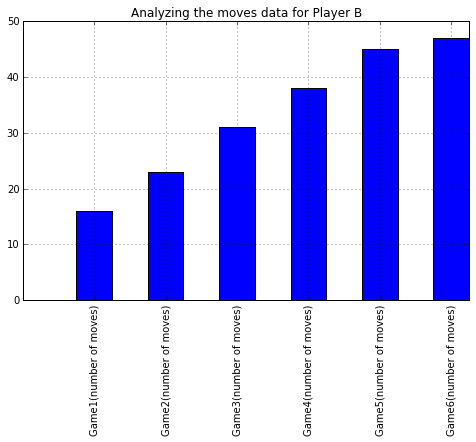

In [58]:
B = game_df_movesdata.ix['B']
B.plot(kind='bar', figsize=(8,5), title="Analyzing the moves data for Player B")

In [60]:
game_df.head()

,Game1(number of moves),Game2(number of moves),Game3(number of moves),Game4(number of moves),Game5(number of moves),Game6(number of moves)
Players,,,,,,
A,12,16,25,26,47,12
B,16,23,31,38,45,47
C,15,16,25,36,43,34
D,12,16,20,34,36,10
E,11,18,30,35,40,19
